In [1]:
#Make sure retinatools is in the python path
import sys
sys.path.append('../') 

In [2]:
import numpy as np
import pylab as pl
from scipy.optimize import minimize

from retinatools.library import filter_video_PC, SimpleLowpass, LuminanceGainControl, nltan, rec, SimpleHighpass, compare_to_file

In [3]:
fitparameters   = {'xoff': -1, 'yoff': 1, 'rcenterM': 8.0, 'rcenterL': 10, \
                 'lum_factor': 870, 'tau1': 7.6, 'tau2': 44, 'k1': 0.082, 'tau3': 800,\
                 'alpha': 0.7, 'k2': -5, 'o1': 0.1, 'dt': 1000/150.}

file            =  './data/File225+L-Moff.txt';  # yes, +L-M

In [4]:
lum_signalM, lum_signalL = filter_video_PC('../stimuli/1x10_256.mpg', 9750, fitparameters)

In [5]:
signalM = SimpleLowpass(fitparameters['lum_factor']*lum_signalM, fitparameters['dt'], fitparameters['tau1'])
signalM = SimpleLowpass(signalM, fitparameters['dt'], fitparameters['tau1'])
signalM = SimpleLowpass(signalM, fitparameters['dt'], fitparameters['tau1'])
signalM = LuminanceGainControl(signalM, fitparameters['dt'], fitparameters['tau2'])

signalL = SimpleLowpass(fitparameters['lum_factor']*lum_signalL, fitparameters['dt'], fitparameters['tau1']) 
signalL = SimpleLowpass(signalL, fitparameters['dt'], fitparameters['tau1'])
signalL = SimpleLowpass(signalL, fitparameters['dt'], fitparameters['tau1'])
signalL = LuminanceGainControl(signalL, fitparameters['dt'], fitparameters['tau2'])

bM = nltan(signalM, fitparameters['k1'])
bL = nltan(signalL, fitparameters['k1'])
out = rec( bM - fitparameters['alpha']*bL )

out = SimpleHighpass(out, fitparameters['dt'], fitparameters['tau3'])
Rpc = rec(fitparameters['k2']*out + fitparameters['o1'])

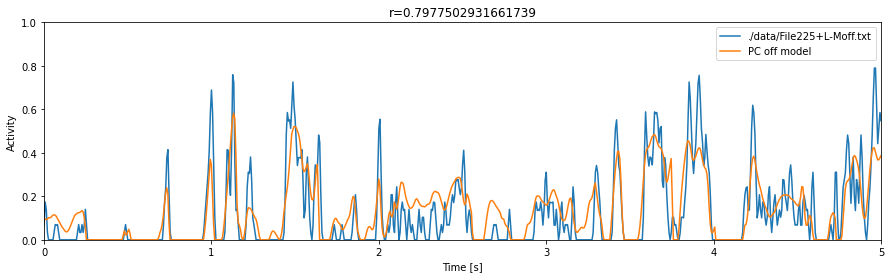

In [6]:
shift = 1 #shift 1 - as all PC cells

pl.rcParams['figure.figsize'] = [15, 4]

cell_activity = np.loadtxt(file)
ttC = np.arange(0, len(cell_activity[:,0])/150., 1/150.)
pl.plot(ttC, cell_activity[:,0], label = file)

ttM = np.arange(-5+shift*0.006, -5+shift*0.006+len(Rpc)/150., 1/150.)
pl.plot(ttM, Rpc, label = 'PC off model')

pl.xlim([0, 5])
pl.ylim([0,1.0])
cc = compare_to_file(file, Rpc, fitparameters['dt'], 0, shift) 
pl.title('r=' + str(cc))
pl.xlabel("Time [s]")
pl.ylabel("Activity")
pl.legend();